## Naive Bayes

### O Naive Bayes é um algoritmo de classificação probabilístico baseado no teorema de Bayes, que assume independência condicional entre os recursos (variáveis independentes) dado o valor da classe (variável dependente). Ele pode ser estendido para lidar com problemas de classificação multiclasse de diferentes maneiras, sendo as duas abordagens principais:

### **1-One-vs-Rest (OvR) ou One-vs-All (OvA):**

#### Nesta abordagem, para um problema com  K classes distintas, são treinados K classificadores binários. Cada classificador é treinado para distinguir uma classe dos restantes. Durante o treinamento, os dados de treinamento são transformados de modo que cada classificador binário aprende a prever se uma instância pertence à sua classe específica ou não. Na etapa de predição, cada classificador é consultado para fazer uma previsão. A classe predita é então determinada pela classe que possui o maior valor de probabilidade condicional dado pelo modelo Naive Bayes.

### **2-Multinomial Naive Bayes:**

#### Esta é uma variante específica do Naive Bayes projetada para lidar diretamente com dados que possuem características discretas, como contagens de palavras em um corpus de texto. É amplamente utilizado para problemas de classificação multiclasse onde os recursos são representados como contagens de ocorrência de palavras ou termos. Nesse caso, o modelo calcula a probabilidade de uma instância pertencer a cada classe usando a distribuição multinomial das ocorrências de palavras (ou características discretas) para cada classe. A classe com a maior probabilidade condicional é então selecionada como a classe predita.

----------------------------------------------------------------------------------------------------------------------

## Funcionamento Geral do Naive Bayes para Classificação Multiclasse:

### **1-Treinamento:**

#### -Durante o treinamento, o Naive Bayes calcula as probabilidades a priori de cada classe $𝑃(𝐶_𝑘)$, onde $𝐶_𝑘$ é a k-ésima classe.

#### -Também calcula as probabilidades condicionais $𝑃(𝑋_𝑖∣𝐶_𝑘)$, onde $𝑋_𝑖$ representa o i-ésimo recurso (ou característica) e $𝐶_𝑘$ a k-ésima classe.
#### -Para o modelo Multinomial Naive Bayes, essas probabilidades são calculadas usando as frequências das características em cada classe.

### **2-Predição:**

#### -Durante a predição, o modelo calcula a probabilidade posterior de cada classe dada uma instância de entrada utilizando o teorema de Bayes: $$ P(C_k|X) = \frac {P(X | C_k) \cdot P(C_k)}{P(X)} $$ onde X é o vetor de características da instância de entrada.
#### -Como o denominador $P(X)$ é constante para todas as classes, pode ser ignorado na comparação das probabilidades.
#### -A classe predita é aquela que maximiza $P(C_k∣X)$, ou seja, a classe com a maior probabilidade posterior dada a instância de entrada.

#### O Naive Bayes é eficiente e rápido para treinar e predizer, especialmente útil em grandes conjuntos de dados e problemas de classificação de texto, como análise de sentimentos ou categorização de documentos. No entanto, sua suposição de independência condicional entre os recursos pode ser um ponto fraco se essa condição não for razoavelmente verdadeira nos dados.

--------------------------------------------------------------------------------------------------------------------------

### Para treinar um modelo de Naive-Bayes para fazer a classificação multiclasse da coluna 'PROF_MATEMATICA_CATEG' usando os dados codificados do arquivo CLASS.csv, você pode seguir os seguintes passos:

### **1-Carregar os dados**
#### Primeiro carregamos os dados do arquivo CSV. Supondo que você já fez isso e tem o DataFrame gnetDf com os dados carregados.

### **2-Preparar os dados**
#### Certifique-se de que as colunas relevantes para a previsão estão presentes no DataFrame. Para o treinamento do modelo Naive-Bayes multiclasse com as colunas mencionadas, você pode selecionar as seguintes colunas como features:

### **3-Dividir os dados em conjunto de treino e teste**
#### É importante dividir os dados em conjuntos de treino e teste para avaliar o desempenho do modelo.

### **4-Treinar o modelo Naive-Bayes Multinomial**
#### Como o Naive-Bayes Multinomial é adequado para dados discretos (como os seus dados codificados), podemos usá-lo diretamente.

-----------------------------------------------------------------------------------------------------------------

In [10]:
# Importar as bibliotecas necessárias
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [11]:
# Carregar o dataset
gnetDf = pd.read_csv("datasets/CLASS.csv")

In [12]:
# Selecionar as colunas de interesse
features = ['SEXO_CATEG', 'IDADE_CATEG', 'FORMACAO_MAE_CATEG', 'FORMACAO_PAI_CATEG', 'ACESSO_INTERNET_CATEG',
            'NUMERO_COMPUTADORES_CATEG', 'INICIOU_ESTUDOS_CATEG', 'ENSINO_FUNDAMENTAL_CATEG', 'REPROVOU_CATEG',
            'ABANDONOU_CATEG', 'GESTAO_CATEG', 'DUVIDAS_CATEG', 'CORRIGEM_CATEG',
            'PONTOS_PORTUGUES_CATEG', 'PROF_PORTUGUES_CATEG','TURNO_ESCOLAR_CATEG']

# Retirar 'PONTOS_MATEMATICA_CATEG' por conta do viés com a coluna target
target = 'PROF_MATEMATICA_CATEG'
# Selecionar features e variável alvo no DataFrame
data = gnetDf[features + [target]]

In [13]:
# Dividir os dados em conjunto de treino e teste (por exemplo, 90% treino, 10% teste)
train_data, test_data = train_test_split(data, test_size=0.1, random_state=42)

# Separar features e variável alvo no conjunto de treino
X_train = train_data[features]
y_train = train_data[target]

# Separar features e variável alvo no conjunto de teste
X_test = test_data[features]
y_test = test_data[target]

In [14]:
# Inicializar o classificador Naive-Bayes Multinomial
nb_classifier = MultinomialNB()

# Treinar o modelo
nb_classifier.fit(X_train, y_train)


MultinomialNB()

In [15]:
# Fazer previsões no conjunto de teste
y_pred = nb_classifier.predict(X_test)

In [16]:
# Calcular a matriz de confusão
conf_matrix = confusion_matrix(y_test, y_pred)

# Imprimir a matriz de confusão
print('Matriz de Confusão:')
print(conf_matrix)

Matriz de Confusão:
[[   7 1239    1    0    0]
 [   4 2306    5    0    0]
 [   2 1066   12    0    0]
 [   0  469   21    0    0]
 [   0  105   12    1    0]]


In [17]:
# Imprimir o relatório de classificação
print('Relatório de Classificação:')
print(classification_report(y_test, y_pred, target_names=['1', '2', '3', '4','5']))

Relatório de Classificação:
              precision    recall  f1-score   support

           1       0.54      0.01      0.01      1247
           2       0.44      1.00      0.61      2315
           3       0.24      0.01      0.02      1080
           4       0.00      0.00      0.00       490
           5       0.00      0.00      0.00       118

    accuracy                           0.44      5250
   macro avg       0.24      0.20      0.13      5250
weighted avg       0.37      0.44      0.28      5250



c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

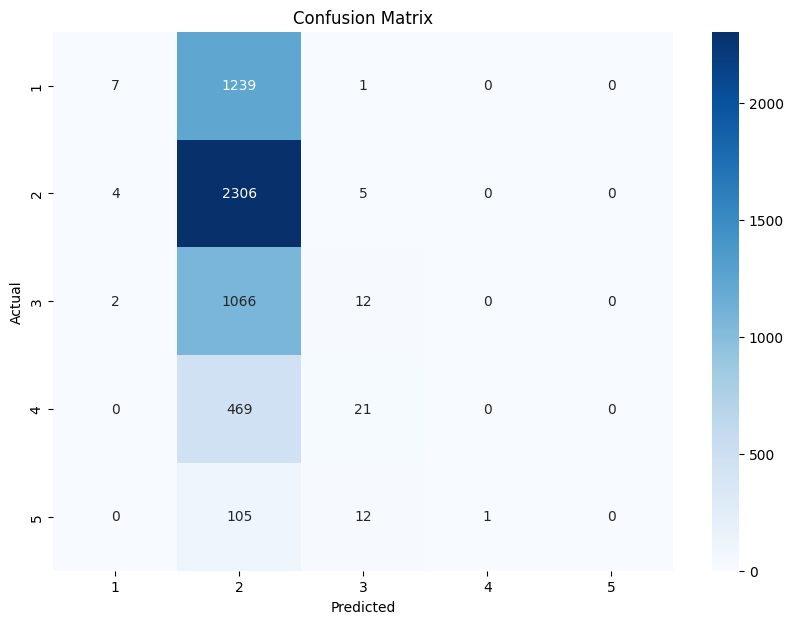

In [18]:
# Visualizar a matriz de confusão usando seaborn
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['1', '2', '3','4' ,'5'], yticklabels=['1', '2', '3','4' ,'5'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()